In [41]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch import nn

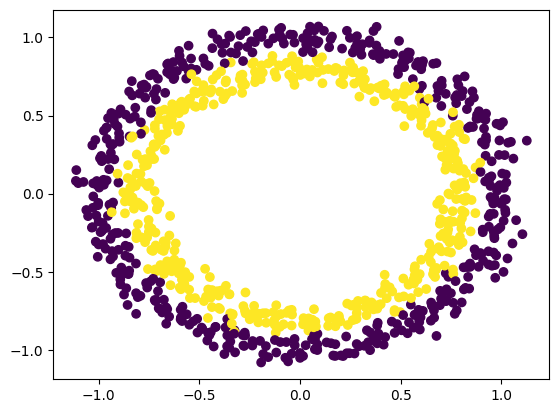

In [56]:
X, y = make_circles(n_samples=1000, noise=0.05, random_state=0)

data = np.hstack((X, y.reshape(-1,1)))
df = pd.DataFrame(data)

fig, ax = plt.subplots()
ax.scatter(x=X[:,0], y=X[:,1],c=y)

In [66]:
Xpy = torch.from_numpy(X).type(torch.float)
ypy = torch.from_numpy(y).type(torch.float)

Xpy_train, Xpy_test, ypy_train, ypy_test = train_test_split(Xpy,ypy, test_size=0.2)

device = "cude" if torch.cuda.is_available() else "cpu"
Xpy_train.to(device)
Xpy_test.to(device)
ypy_train.to(device)
ypy_test.to(device)


torch.manual_seed(0)
class CircleClassificationModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        layer_1_value = self.layer_1(x)
        print(layer_1_value)
        return self.layer_2(layer_1_value)
    
model_0 = CircleClassificationModel().to(device)
model_0.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[-0.0053,  0.3793],
                      [-0.5820, -0.5204],
                      [-0.2723,  0.1896],
                      [-0.0140,  0.5607],
                      [-0.0628,  0.1871]])),
             ('layer_1.bias',
              tensor([-0.2137, -0.1390, -0.6755, -0.4683, -0.2915])),
             ('layer_2.weight',
              tensor([[ 0.0166,  0.1768,  0.2683, -0.3032, -0.1947]])),
             ('layer_2.bias', tensor([0.1624]))])

In [77]:
torch.manual_seed(0)
model_0_sequential = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0_sequential.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0053,  0.3793],
                      [-0.5820, -0.5204],
                      [-0.2723,  0.1896],
                      [-0.0140,  0.5607],
                      [-0.0628,  0.1871]])),
             ('0.bias', tensor([-0.2137, -0.1390, -0.6755, -0.4683, -0.2915])),
             ('1.weight',
              tensor([[ 0.0166,  0.1768,  0.2683, -0.3032, -0.1947]])),
             ('1.bias', tensor([0.1624]))])